In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 18.9 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=146c3e1ee12ffff95c48519085715a16f21c524919461a20763a4ccc08e53ccb
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


(0.0, 1.0)

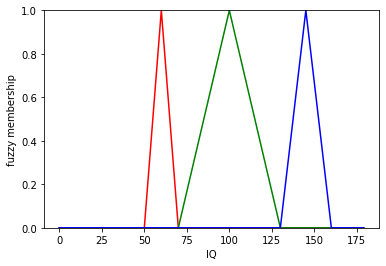

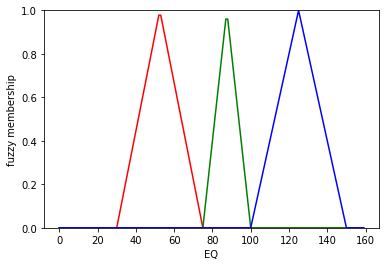

In [3]:
#INTELLIIGENCE ESTIMATOR
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

#first input
IQbase=np.arange(0,180,1) #universe of discourse of IQ
low_iq=fuzz.trimf(IQbase,[50,60,70])
medium_iq=fuzz.trimf(IQbase,[70,100,130])
high_iq=fuzz.trimf(IQbase,[130,145,160])
fig,a=plt.subplots()
a.plot(IQbase,low_iq,'r',IQbase,medium_iq,'g',IQbase,high_iq,'b')
a.set_ylabel("fuzzy membership")
a.set_xlabel("IQ")
a.set_ylim(0,1.0)

#second input
EQbase=np.arange(0,160,1)
low_eq=fuzz.trimf(EQbase,[30,52.5,75])
medium_eq=fuzz.trimf(EQbase,[75,87.5,100])
high_eq=fuzz.trimf(EQbase,[100,125,150])
fig,b=plt.subplots()
b.plot(EQbase,low_eq,'r',EQbase,medium_eq,'g',EQbase,high_eq,'b')
b.set_ylabel("fuzzy membership")
b.set_xlabel("EQ")
b.set_ylim(0,1.0)

(0.0, 1.0)

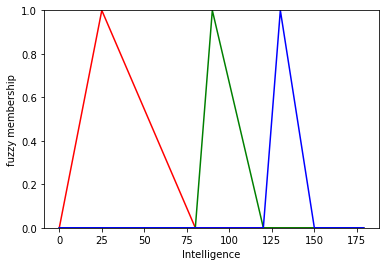

In [4]:
#Output
Intelbase=np.arange(0,180,1)
low_intel=fuzz.trimf(Intelbase,[0,25,80])
medium_intel=fuzz.trimf(Intelbase,[80,90,120])
high_intel=fuzz.trimf(Intelbase,[120,130,150])
fig,c=plt.subplots()
c.plot(Intelbase,low_intel,'r',Intelbase,medium_intel,'g',Intelbase,high_intel,'b')
c.set_ylabel("fuzzy membership")
c.set_xlabel("Intelligence")
c.set_ylim(0,1.0)

[0.66666667]
[0.61538462]


(0.0, 1.0)

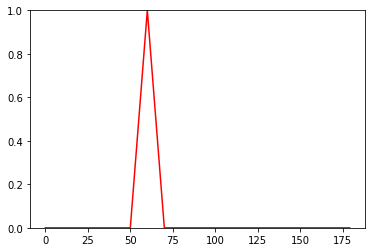

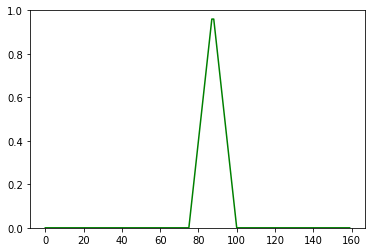

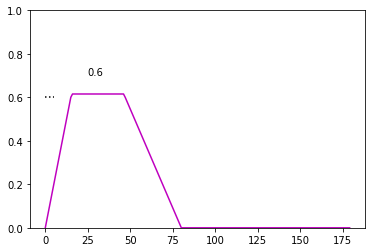

In [5]:
#RULES
#rule 1 If IQ is low and EQ is medium then Intelligence is low
f1=np.array([40]) #Values taken when iq is low
f2=np.array([75]) #values taken when eq is medium
r1=fuzz.trimf(f1,[20,50,70]) #range of low iq
r2=fuzz.trimf(f2,[55,87.5,100]) #range of medium eq
min1=min(r1,r2)  

fig,a=plt.subplots()
a.plot(IQbase,low_iq,'r') #graph when iq is low
a.set_ylim(0,1.0)
print(r1)
print(r2)

MIN1=np.fmin(min1,low_intel) 
fig,b=plt.subplots()
b.plot(EQbase,medium_eq,'g')  #graph when eq is medium
b.set_ylim(0,1.0)

fig,c=plt.subplots()   #graph when intelligence is low
c.plot(Intelbase,MIN1,'m')
c.hlines(0.6,0,5,linestyles="dotted")
c.annotate('0.6',(25,0.7))
c.set_ylim(0,1.0)


[0.22222222]


(0.0, 1.0)

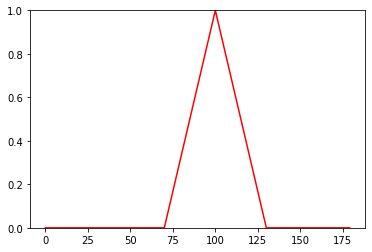

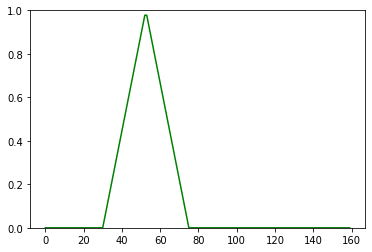

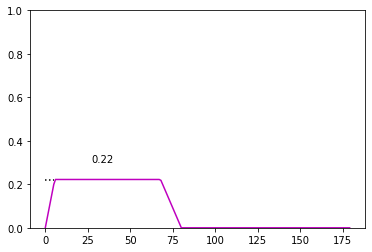

In [14]:
#rule 2 If IQ is medium and EQ is low then Intelligence is low
f1=np.array([90])
f2=np.array([70])
r3=fuzz.trimf(f1,[70,100,130])
r4=fuzz.trimf(f2,[30,52.5,75])

fig,a=plt.subplots()
a.plot(IQbase,medium_iq,'r')
a.set_ylim(0,1.0)

min2=min(r3,r4)
MIN2=np.fmin(min2,low_intel)
print(r4)
fig,b=plt.subplots()
b.plot(EQbase,low_eq,'g')
b.set_ylim(0,1.0)

fig,c=plt.subplots()
c.plot(Intelbase,MIN2,'m')
c.hlines(0.22,0,5,linestyles="dotted")
c.annotate('0.22',(27,0.3))
c.set_ylim(0,1.0)


(0.0, 1.0)

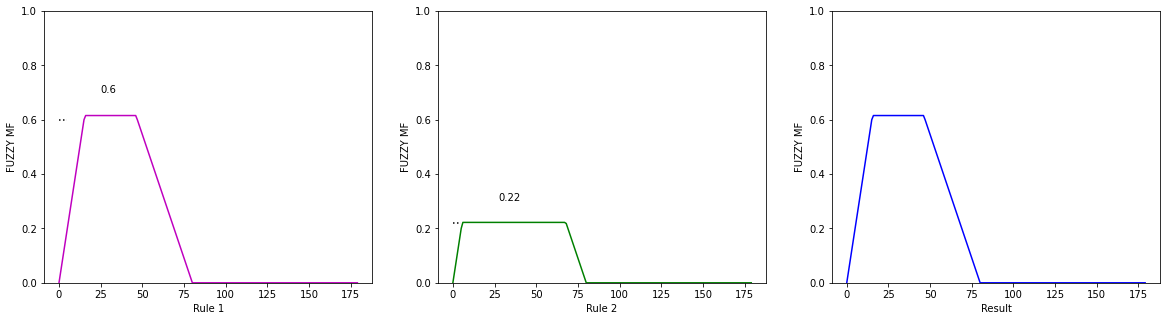

In [15]:
#Combining the two rules
min5=np.fmax(MIN1,MIN2)
fig,(d,g,e)=plt.subplots(nrows=1,ncols=3,figsize=(20,5), sharey= False)
d.plot(Intelbase,MIN1,'m')
d.set_ylabel("FUZZY MF")
d.set_xlabel("Rule 1")
d.hlines(0.6,0,5,linestyles="dotted")
d.annotate('0.6',(25,0.7))
d.set_ylim(0,1.0)

g.plot(Intelbase,MIN2,'g')
g.set_ylabel("FUZZY MF")
g.set_xlabel("Rule 2")
g.hlines(0.22,0,5,linestyles="dotted")
g.annotate('0.22',(27,0.3))
g.set_ylim(0,1.0)

e.plot(Intelbase,min5,'b')
e.set_ylabel("FUZZY MF")
e.set_xlabel("Result")
e.set_ylim(0,1.0)


36.07088036117383


Text(25, 0.64, '0.6')

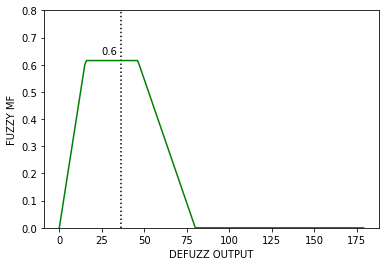

In [16]:
#Defuzzification using Weighted Average
defuzz_op=fuzz.defuzz(Intelbase, min5,'centroid') #centroid finds the mid value of the area 
print(defuzz_op)
fig1,e=plt.subplots()
e.plot(Intelbase,min5,'g')
e.set_ylabel("FUZZY MF")
e.set_xlabel("DEFUZZ OUTPUT")
e.set_ylim(0,0.8)
e.vlines(36.07,0,5,linestyles="dotted")
e.annotate('0.6',(25,0.64))

25.0


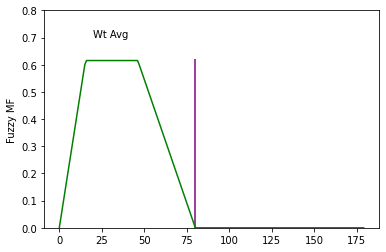

In [86]:
#Weighted Average
def area(a,b,c,d,h):
  centre=(a+(d-a)/2)
  area=0.5*((d-a)+(c-b))*h
  num=area*centre
  return(area,num)

a1,x1=area(0,80,17,50,0.6)
g=(x1/a1)
print(g)

plt.plot(Intelbase,min5,'g')
plt.vlines(80,0,0.62,color='purple')
plt.ylabel("Fuzzy MF")
plt.ylim(0,0.8)
plt.text(20,0.7,"Wt Avg")
plt.show()

[0.66666667]
[0.61538462]
[0.66666667]
[0.61538462]


(0.0, 1.0)

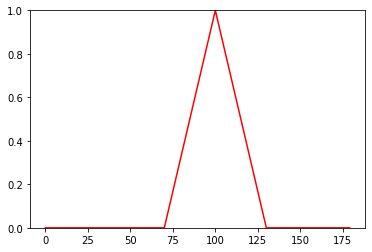

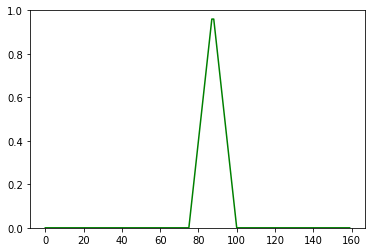

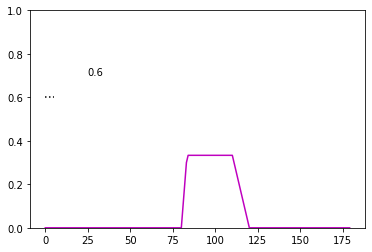

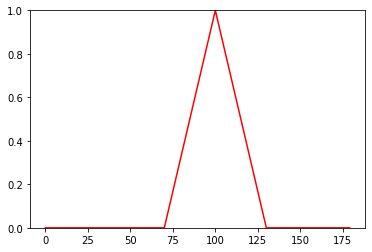

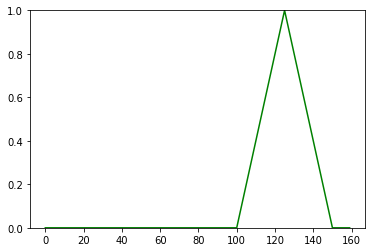

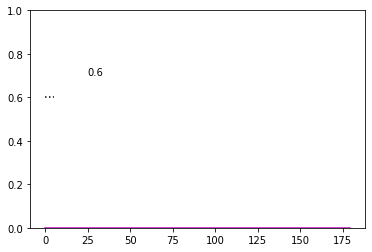

In [88]:
#Extra Rule Definition
f9=np.array([120]) #Values taken when iq is low
f8=np.array([75]) #values taken when eq is medium
r6=fuzz.trimf(f9,[70,100,130]) #range of medium iq
r7=fuzz.trimf(f8,[55,87.5,100]) #range of medium eq
min00=min(r6,r7)  

fig,a=plt.subplots()
a.plot(IQbase,medium_iq,'r') #graph when iq is low
a.set_ylim(0,1.0)
print(r1)
print(r2)

MIN11=np.fmin(min00,medium_intel) 
fig,b=plt.subplots()
b.plot(EQbase,medium_eq,'g')  #graph when eq is medium
b.set_ylim(0,1.0)

fig,c=plt.subplots()   #graph when intelligence is low
c.plot(Intelbase,MIN11,'m')
c.hlines(0.6,0,5,linestyles="dotted")
c.annotate('0.6',(25,0.7))
c.set_ylim(0,1.0)


r11=fuzz.trimf(f9,[70,100,130]) #range of med iq
r12=fuzz.trimf(f8,[100,125,150]) #range of high eq
min22=min(r11,r12)  

fig,a=plt.subplots()
a.plot(IQbase,medium_iq,'r') #graph when iq is low
a.set_ylim(0,1.0)
print(r1)
print(r2)

MIN44=np.fmin(min22,high_intel) 
fig,b=plt.subplots()
b.plot(EQbase,high_eq,'g')  #graph when eq is medium
b.set_ylim(0,1.0)

fig,c=plt.subplots()   #graph when intelligence is low
c.plot(Intelbase,MIN44,'m')
c.hlines(0.6,0,5,linestyles="dotted")
c.annotate('0.6',(25,0.7))
c.set_ylim(0,1.0)
